In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Step 1: Load the Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
gender_submission_df = pd.read_csv('/content/drive/MyDrive/gender_submission.csv')

In [3]:
# Step 2: Inspect the Data
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Step 3: Data Cleaning
# Handling missing values
# For example, fill missing age values with median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Cabin'].fillna('Unknown', inplace=True)

In [8]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
# Drop unnecessary columns
train_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Encode categorical variables
# Convert 'Sex' to numerical values
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' column
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)

# Step 4: Now we will be doing Exploratory Data Analysis (EDA) for which we are first going to do 3 analysis, given below:

1) Univariate Analysis
2) Bivariate Analysis
3) Multivariate Analysis

<ipython-input-15-1f36b4ea7147>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_df, palette= 'bright')


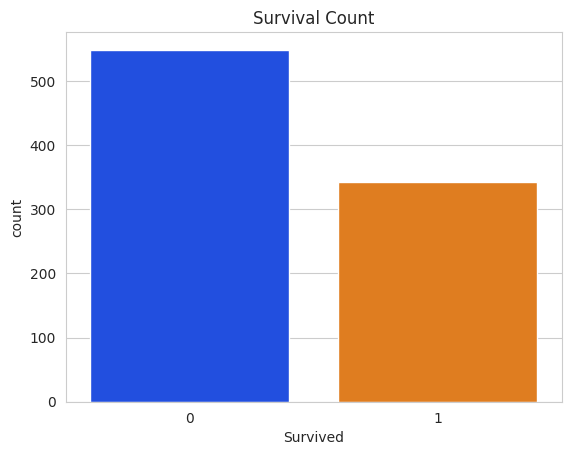

<ipython-input-15-1f36b4ea7147>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=train_df, palette= 'bright')


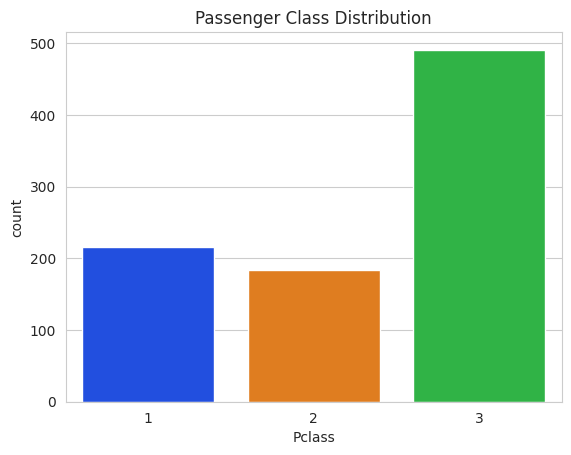

<ipython-input-15-1f36b4ea7147>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Age'], kde=True, bins=40, color= 'darkorange')


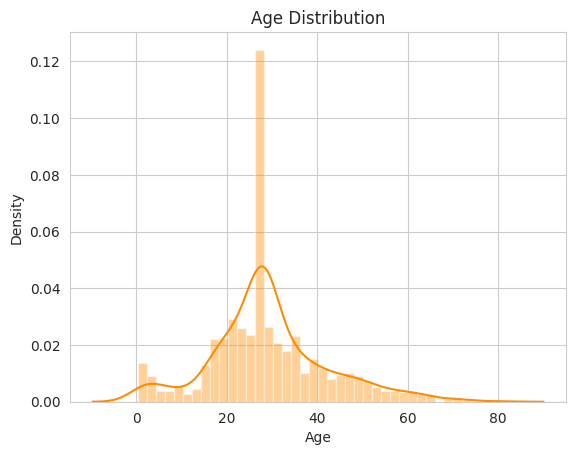

<ipython-input-15-1f36b4ea7147>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp', data=train_df, palette= 'bright')


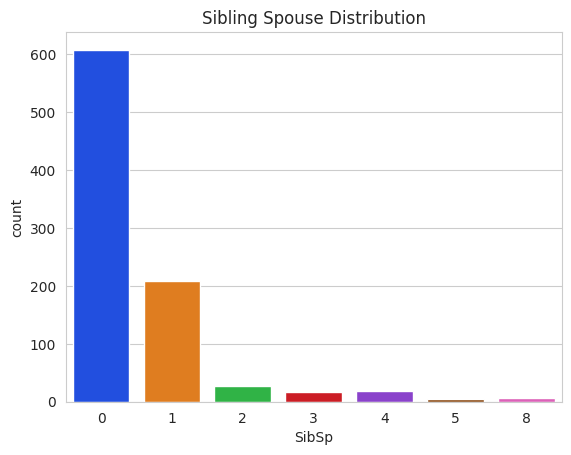

<ipython-input-15-1f36b4ea7147>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Parch', data=train_df, palette= 'bright')


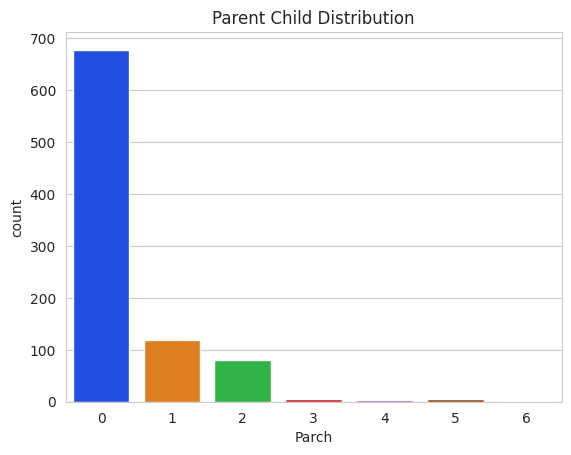

In [15]:
# Step 4.1: Univariate analysis

# Survived
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train_df, palette= 'bright')
plt.title('Survival Count')
plt.show()

# Pclass
sns.set_style('whitegrid')
sns.countplot(x='Pclass', data=train_df, palette= 'bright')
plt.title('Passenger Class Distribution')
plt.show()

# Age
sns.distplot(train_df['Age'], kde=True, bins=40, color= 'darkorange')
plt.title('Age Distribution')
plt.show()

#SibSp
sns.countplot(x='SibSp', data=train_df, palette= 'bright')
plt.title('Number of Siblings/Spouses Aboard')
plt.show()

#Parch
sns.countplot(x='Parch', data=train_df, palette= 'bright')
plt.title('Parent Child Distribution')
plt.show()

#Observations from Univariate Ananlysis:

**Observation from Graph 1:** The number of people survived is lesser than the number of people died.

**Observation from Graph 2:** Number of passengers with a 3rd class ticket was higher than the number which we get when we add the passengers with 2nd and 1st class Ticket.

**Observation from Graph 3:** No. of Men died were more than no. of women died.

**Observation from Graph 4:** Most of the passengers were young, lying in the age group of 15-45 years of age. Also very few passengers were above 60 years of age.

**Observation from Graph 5:** Approx. 75% of the passengers were travelling alone.

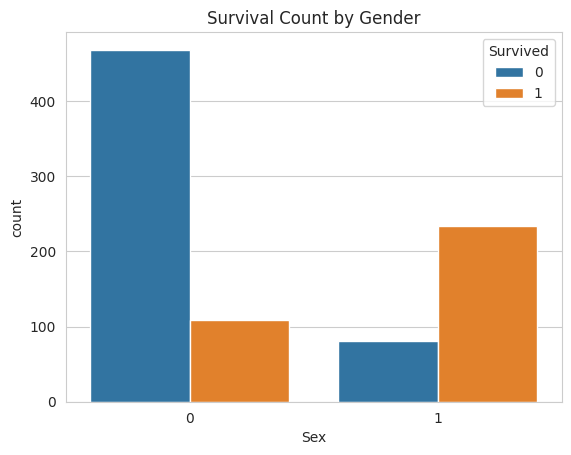

<ipython-input-17-ed33c8774582>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=train_df, palette='bright')


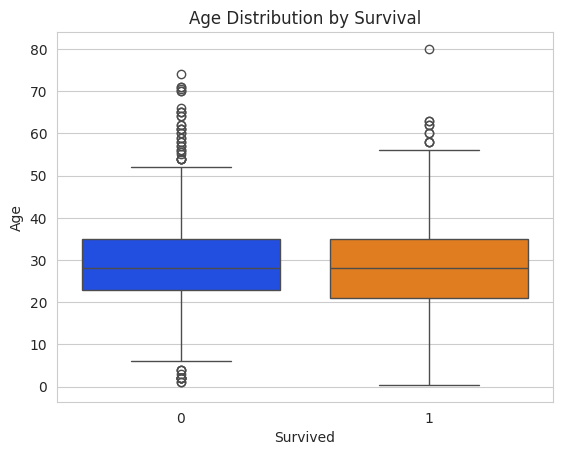

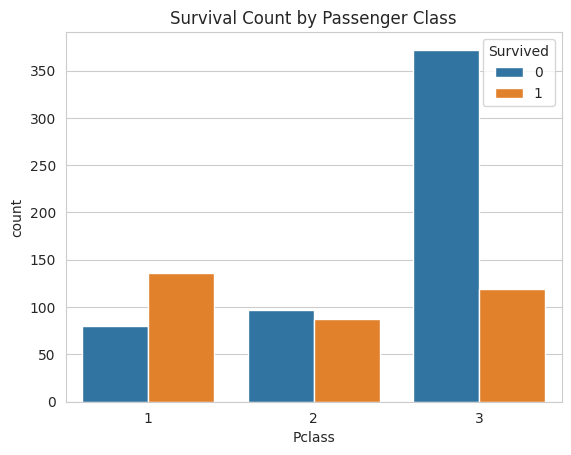

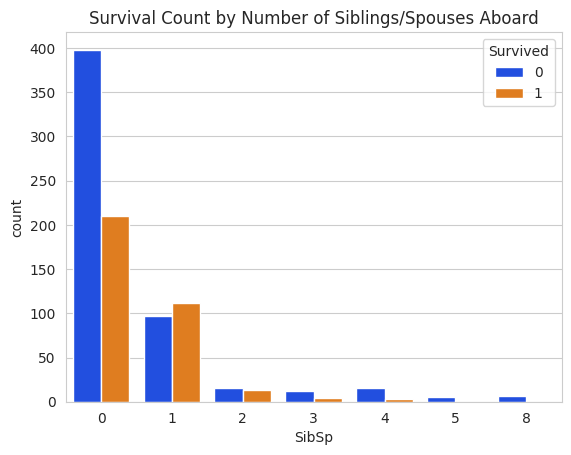

<ipython-input-17-ed33c8774582>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=train_df, palette='bright')


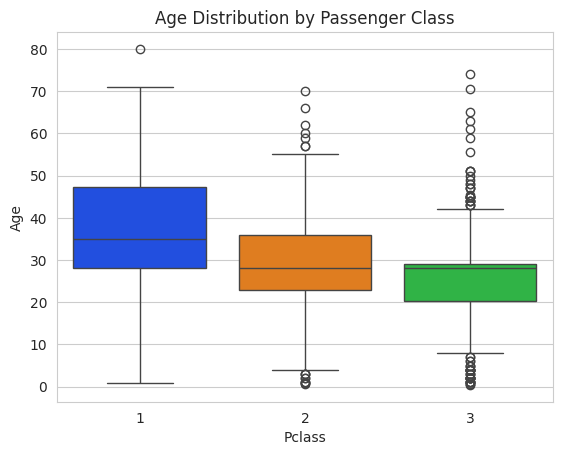

In [17]:
# Step 4.2: Bivariate Analysis

# Survived vs Sex
sns.set_style('whitegrid')
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Count by Gender')
plt.show()

#Survived vs Age
sns.boxplot(x='Survived', y='Age', data=train_df, palette='bright')
plt.title('Age Distribution by Survival')
plt.show()

#Pclass vs survived
sns.set_style('whitegrid')
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Count by Passenger Class')
plt.show()

#survived vs sibsp
sns.countplot(x='SibSp', hue='Survived', data=train_df, palette='bright')
plt.title('Survival Count by Number of Siblings/Spouses Aboard')
plt.show()

#Pclass vs Age
sns.boxplot(x='Pclass', y='Age', data=train_df, palette='bright')
plt.title('Age Distribution by Passenger Class')
plt.show()

#Observations from Bivariate Ananlysis

**Observation from Graph 1:** Among men and women the amount of men survived is lesser as compared to women.

**Observation from Graph 2:** Average age of passengers who died were around 28 years of age.

**Observation from Graph 3:** Approx. 75% of the 3rd Class ticket holders died, approx. 50% of the 2nd class ticket holders died and around 77% of the 3rd class ticket holder died.

**Observation from Graph 4:** Passengers with 1 Sibling/Spouse Aboard Had a Higher Survival Rate Compared to Those with No Siblings/Spouses.

**Observation from Graph 5:**The average age of Class 1 passengers was around 35 years, that off class 2 passengers were 28 years, and finally of class 3 passengers were around 29 years.



<Figure size 1200x1000 with 0 Axes>

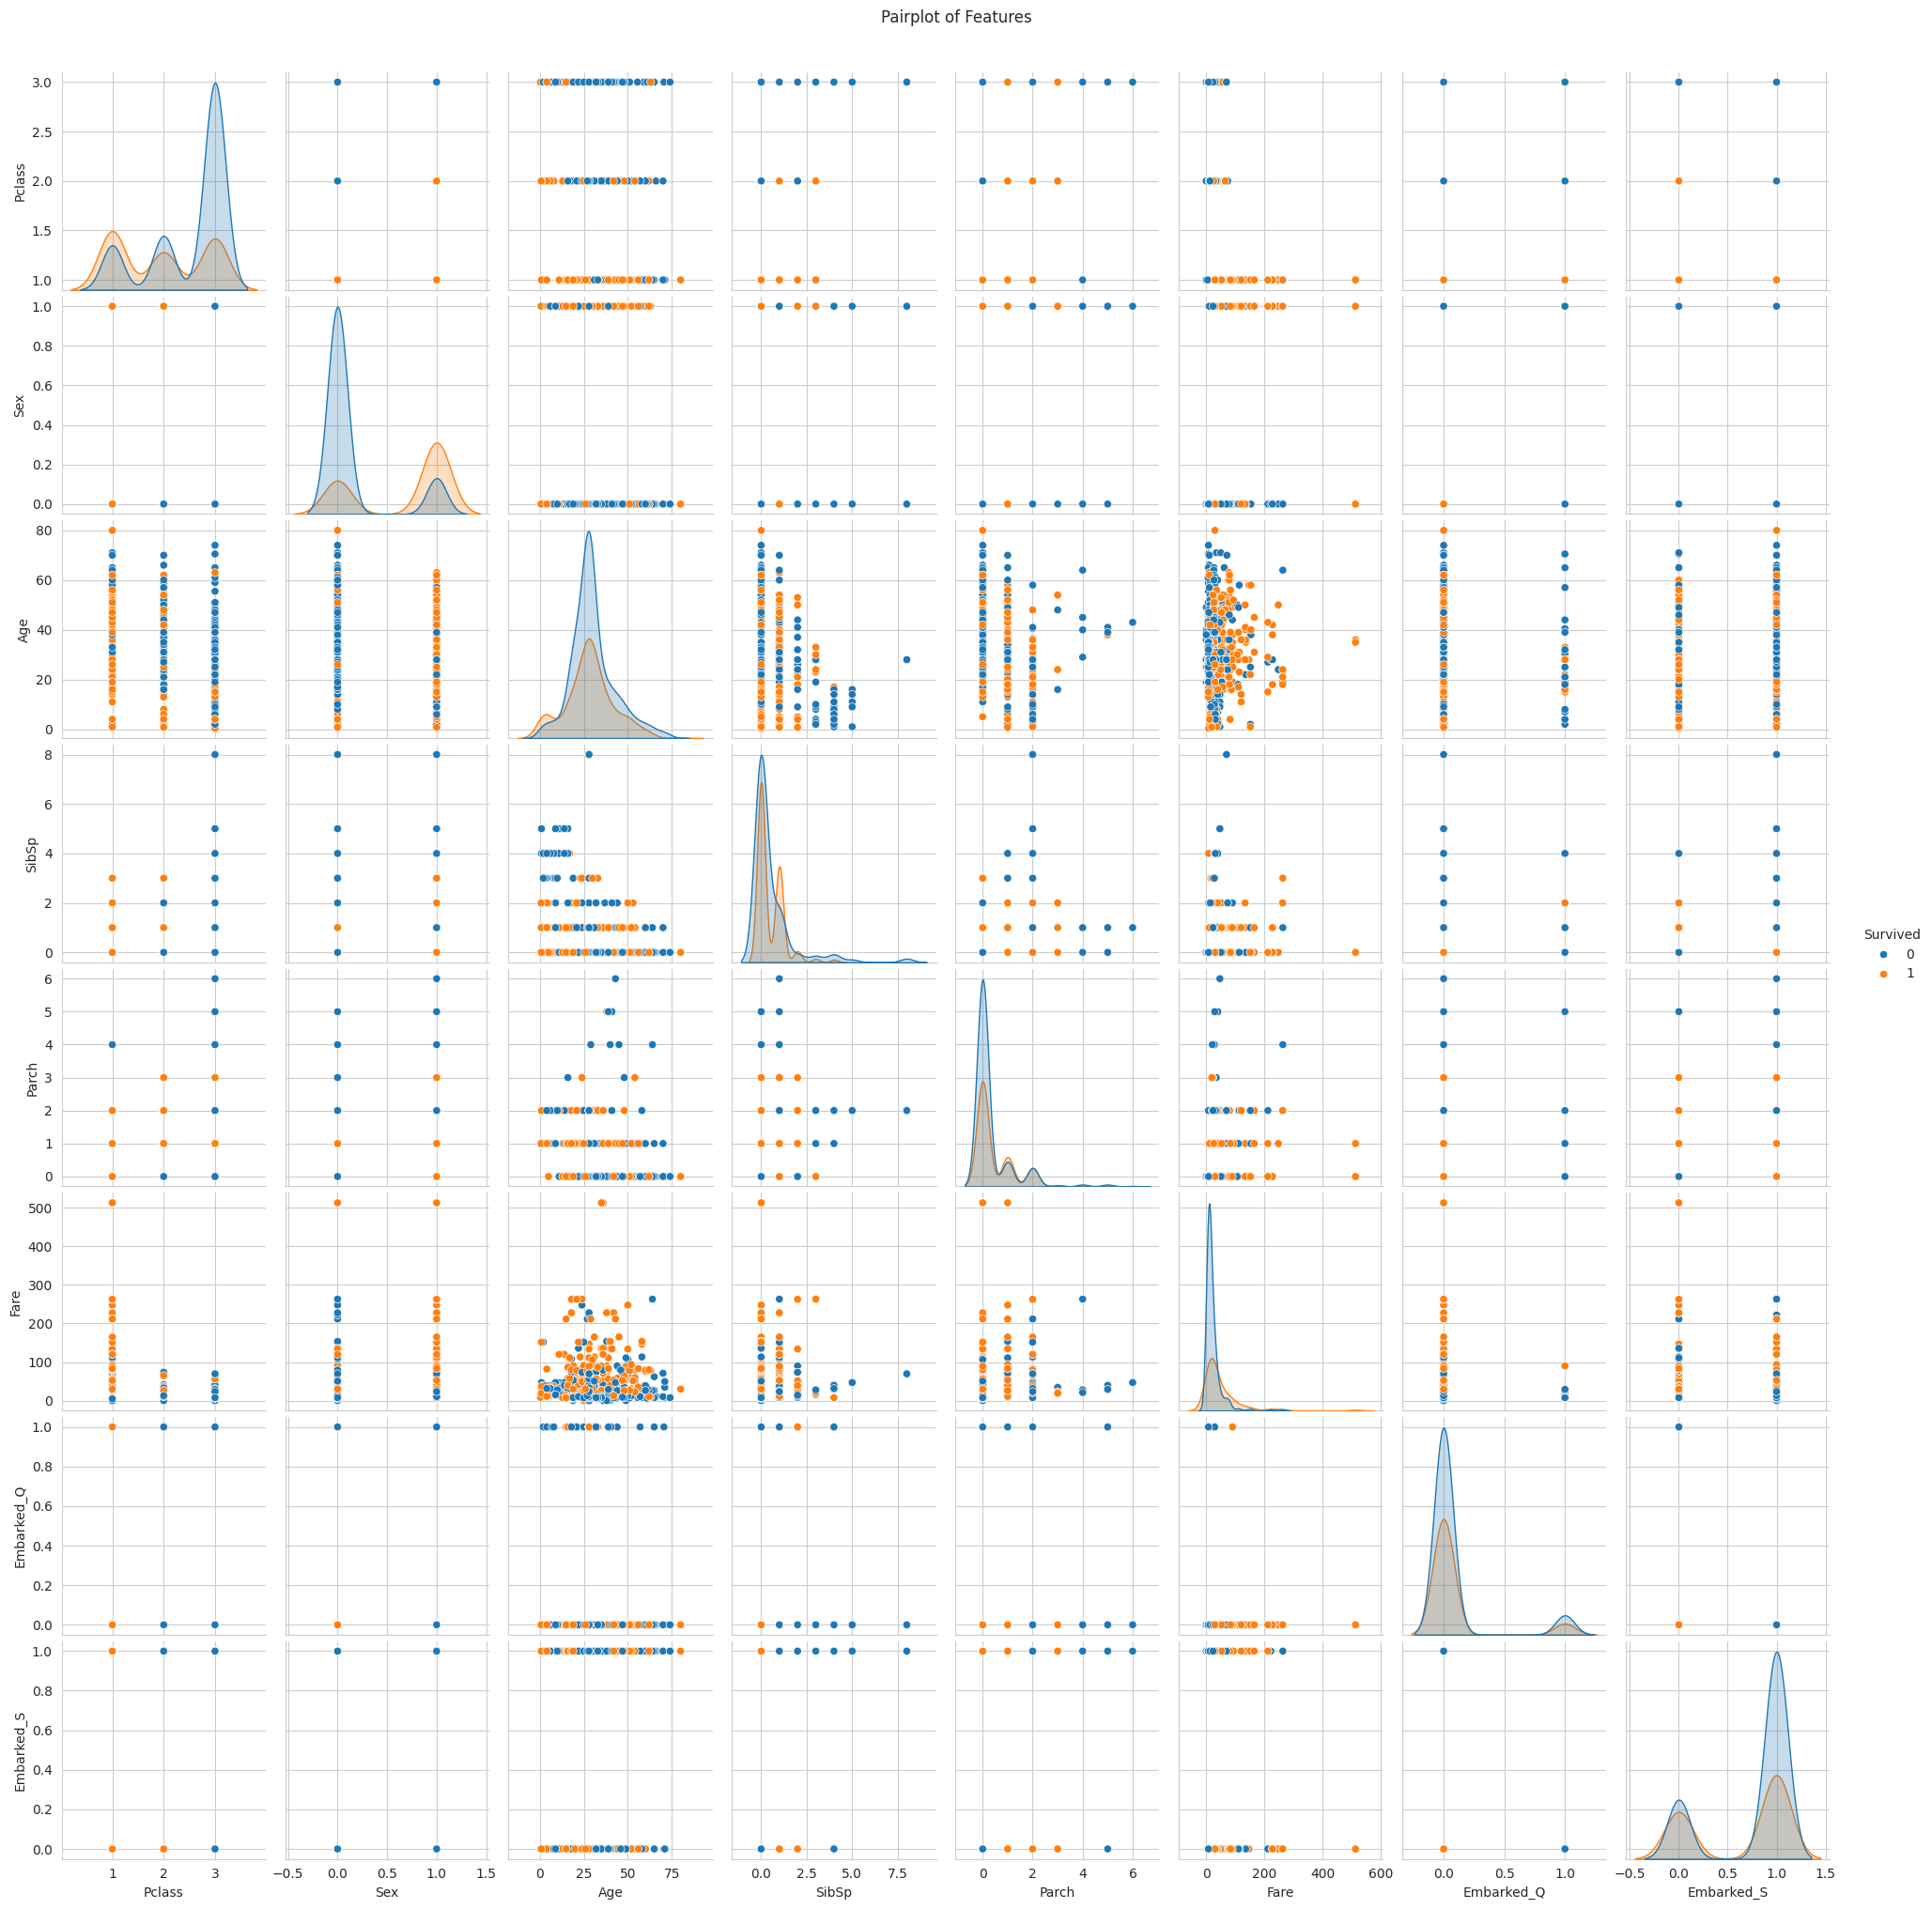

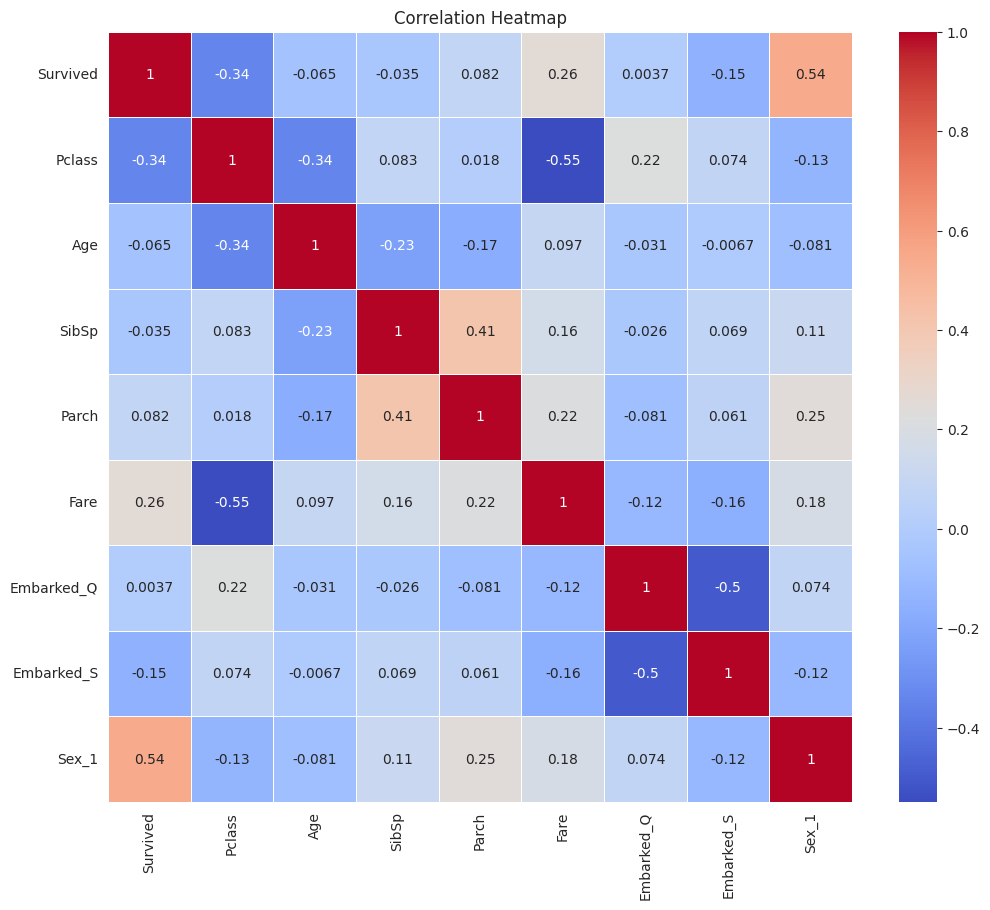

In [28]:
#Step 4.3: Multivariate Analysis

# Pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(train_df, hue='Survived')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

# One-hot encode categorical variables (only 'Sex' in this case)
train_df_encoded = pd.get_dummies(train_df, columns=['Sex'], drop_first=True)

# Drop unnecessary columns
train_df_encoded.drop(columns=['Cabin'], inplace=True)

# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = train_df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
train_df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S,Sex_1
0,0,3,22.0,1,0,7.2500,Unknown,False,True,False
1,1,1,38.0,1,0,71.2833,C85,False,False,True
2,1,3,26.0,0,0,7.9250,Unknown,False,True,True
3,1,1,35.0,1,0,53.1000,C123,False,True,True
4,0,3,35.0,0,0,8.0500,Unknown,False,True,False


#Observations from multivariate Ananlysis:

**Observations from Pairplot:**
1. The pairplot shows a strong correlation between the Sex feature and Survived. Females (coded as 1) have a higher survival rate compared to males (coded as 0). This can be seen in the distinct distribution of the Sex feature where a significant proportion of survivors are females.

2. The Pclass feature (passenger class) also shows a noticeable correlation with survival. Passengers in the first class (Pclass=1) have a higher survival rate compared to those in the second and third classes (Pclass=2 and Pclass=3). This is evident from the distributions and the clustering of data points where survivors (orange) are more frequent in the first-class category.

3. Age distribution indicates that younger passengers, particularly children, had a higher survival rate. The density plots for age show that there is a higher concentration of survivors among the younger age groups compared to non-survivors.

**Observations from Coorelation Heatmap:**
1. Sex_1 (being female) has a strong positive correlation with survival (0.54). This indicates that females had a significantly higher survival rate compared to males.

2. Pclass has a moderate negative correlation with survival (-0.34), suggesting that passengers in higher classes (lower Pclass values) had a better chance of survival.

3. Fare has a moderate positive correlation with survival (0.26), indicating that passengers who paid higher fares tended to have a higher survival rate.